# Census Income

Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry
Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was
extracted using the following conditions: ((AAGE&gt;16) &amp;&amp; (AGI&gt;100) &amp;&amp; (AFNLWGT&gt;1) &amp;&amp;
(HRSWK&gt;0)). The prediction task is to determine whether a person makes over $50K a
year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent
estimates of the civilian non-institutional population of the US. These are prepared monthly for
us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and &quot;rake&quot; through them 6 times so
that by the end we come back to all the controls we used. The term estimate refers to
population totals derived from CPS by creating &quot;weighted tallies&quot; of any specified socio-
economic characteristics of the population. People with similar demographic characteristics
should have similar weights. There is one important caveat to remember about this statement.
That is that since the CPS sample is actually a collection of 51 state samples, each with its own
probability of selection, the statement only applies within state.

Dataset Link-
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [123]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [124]:
# reading the df
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [125]:
# checking the first 5 columns of the dataframe. 
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


 - The model seems to be a binary classufication model where in there are only two variable in the target feature(Income) i.e <=50K or >50K are present. 

In [126]:
# Looking at the last 5 values of the dataframe.
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [127]:
# analysing all the columns of the dataframe.
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Obsersation. 
- The age data is ranging between 19 years to 90 years. 
- The Max.no. of Hours_per_week are 99 and minimum is 1

In [128]:
# We are dropping the education since Education number also signifies the same information. 
df.drop(columns=['Education'], inplace=True)

In [129]:
# displaying the number of values of the frame
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Age,73
Workclass,9
Fnlwgt,21647
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2
Capital_gain,119


In [130]:
# Listing the total columns to the list
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [131]:
# Checking the unique values with their total count 
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


Column: Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Column: Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


Column: Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


Column: Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorce

Observation: 
- In terms of education the max people belongs to  HS-grad:10501. 
- Maximum number of people are working for 40 15216 Hours_per_week. 
- The most no. of people belongs to United-States: 29169
- Income is a binary feature where in most of the people are under the category <=50K    24719
- Column: Capital_loss has max number of people 0:31041 and Capital_gain: 0 -    29849
- There are more males than females in the dataframe Male      21789.
- People from the Prof-specialty  4140
- White:27815 has the highest people contributes the most in the occupation.
- There are columns that has values under the below category 
             - column: Native_country : ?               583
             - column: Occupation     : ?               1843
             - column : Workclass     : ?               1836




In [132]:
# Checking the null values in the dataframe.
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

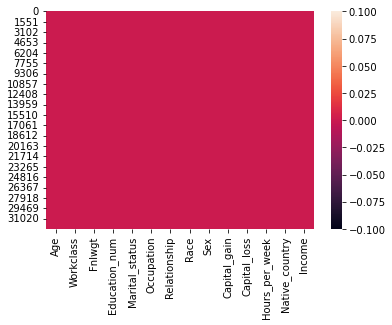

In [133]:
# representing the null values on the graph 
sns.heatmap(df.isnull())

In [134]:
# Checking the shape of the data frame. 
df.shape

(32560, 14)

In [135]:
# seperating the number of rows and columns.
print('No. of columns : ',df.shape[1])
print('No. of rows:  : ',df.shape[0])

No. of columns :  14
No. of rows:  :  32560


In [136]:
# Checking the datatypes. 
df.dtypes.to_frame(" Data Type")

,Data Type
Age,int64
Workclass,object
Fnlwgt,int64
Education_num,int64
Marital_status,object
Occupation,object
Relationship,object
Race,object
Sex,object
Capital_gain,int64


It is observed that there are two types of data present in the dataframe. 
- Object 
- int64

In [137]:
# since there are '?' in the missing values in the dataframe hence we will replace with the NaN values.  
df.replace(' ?', np.NaN, inplace = True)

In [138]:
# To review if the values are replaced with the nan values.
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [139]:
# replacing the ? with the mode values of the dataframe. 
df['Native_country'].replace('NaN', df['Native_country'].mode()[0], inplace=True)
df['Occupation'].replace('NaN', df['Occupation'].mode()[0], inplace=True)
df['Workclass'].replace('NaN', df['Workclass'].mode()[0], inplace=True)

In [140]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [ ]:
sns.pairplot(df,hue="Income",palette="Set1")

In [ ]:
categorical_col = []
numerical_col = []

# Categorize columns as categorical or numerical
for i in df.columns:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
    else:
        numerical_col.append(i)

print("Categorical Columns:", categorical_col)
print("\n")
print("Numerical Columns:", numerical_col)

In [ ]:
# Separating the numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Separating the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# For numerical columns use distplot
for column in numerical_cols:
    sns.distplot(df[column])
    plt.show()

In [ ]:
# For categorical columns use countplot
for column in categorical_cols:
    sns.countplot(df[column])
    plt.show()

In [ ]:
# Checking the skewness of the data. 
df.skew()

In [ ]:
# we will use log transformation for the columns: Age, Fnlwgt, Hours_per_week
df['Age'] = np.log(df['Age'])
df['Fnlwgt'] = np.log(df['Fnlwgt'])
df['Hours_per_week'] = np.log(df['Hours_per_week'])

# Using the square transformation to Education_num
df['Education_num'] = df['Education_num'].apply(lambda x: x**2)

# Apply Box-Cox transformation to Capital_gain and Capital_loss
df['Capital_gain'], _ = stats.boxcox(df['Capital_gain']+1)  # added 1 to avoid division by zero errors
df['Capital_loss'], _ = stats.boxcox(df['Capital_loss']+1)  # added 1 to avoid division by zero errors


In [ ]:
# re-checking the data post carrying the skewness
df.skew()

In [ ]:
# Checking the correlation of the dataframe.
df.corr()

In [ ]:
# We shall proceed without dropping the columns as there no variable that shows high level of correlation with each other. 

In [ ]:
# Plotting the correlation on the graph
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, fmt ="0.2",linecolor="black",)
plt.title("Descriptive graph")
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_label',fontsize=14)
plt.show()

In [ ]:
# Checking for the outliers in the dataframe.
plt.figure(figsize =(10,6))
plotnumber = 1

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(4,5,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
        plt.xticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [ ]:
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(22, 7))
df.corr()['Income'].sort_values(ascending=False).drop('Income').plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Correlation with income', fontsize=15)
plt.title('Correlation between Features and Income', fontsize=20)
plt.show()

In [ ]:
df_copy = df

In [ ]:
df.columns

In [ ]:
#Removing the outlier using Z Score method. 
from scipy.stats import zscore 

out_features = (['Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week'])
Z = np.abs(zscore(df[out_features]))

In [ ]:
threshold = 3
print(np.where(Z>3))

In [ ]:
df1 = df[(Z<3).all(axis=1)]

In [ ]:
print("Data Loss Percentage = ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

In [ ]:
#We shall proceed without removing the outleir since the dataloss percentage is very high. 

Model Building 


In [ ]:
df.head()

In [ ]:
#divinding the data into the labels and the features. 
X = df.drop(columns=['Income']) 
Y = df['Income']

In [ ]:
Y

In [ ]:
# Dividing the data in to the training and the testing data. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
X_train  

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X_train)
X1_test_scaled = scaler.transform(X_test)

In [101]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

In [102]:
Y_res.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [103]:
# Checking for multicollinearity
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X1_train_scaled, i) for i in range(X1_train_scaled.shape[1])]
vif["Features"] = X_train.columns

In [104]:
# To check the vif 
vif

,vif,Features
0,1.221980,Age
1,1.132249,Workclass
2,1.009555,Fnlwgt
3,1.065665,Education_num
4,1.162102,Marital_status
5,1.122786,Occupation
6,1.681230,Relationship
7,1.032664,Race
8,1.549908,Sex
9,1.039768,Capital_gain


there is no multicollinearity issue in the dataframe. Hence we will proceed with the complete columns.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_predictions = LR.predict(X_test)
LR_report = classification_report(y_test, LR_predictions)
LR_confusion_matrix = confusion_matrix(y_test, LR_predictions)

print("LogisticRegression:")
print(LR_report)
print("LogisticRegression:")
print(LR_confusion_matrix)

LogisticRegression:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4960
           1       0.69      0.43      0.53      1552

    accuracy                           0.82      6512
   macro avg       0.76      0.68      0.71      6512
weighted avg       0.80      0.82      0.80      6512

LogisticRegression:
[[4660  300]
 [ 889  663]]


In [108]:
# Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_predictions = DTC.predict(X_test)
DTC_report = classification_report(y_test, DTC_predictions)
DTC_confusion_matrix = confusion_matrix(y_test, DTC_predictions)

print("Decision Tree Classifier Report:")
print(DTC_report)
print("Decision Tree Classifier Matrix:")
print(DTC_confusion_matrix)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4960
           1       0.59      0.61      0.60      1552

    accuracy                           0.80      6512
   macro avg       0.73      0.74      0.73      6512
weighted avg       0.81      0.80      0.81      6512

Decision Tree Classifier Matrix:
[[4293  667]
 [ 610  942]]


In [109]:
# Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
GBC_predictions = GBC.predict(X_test)
GBC_report = classification_report(y_test, GBC_predictions)
GBC_confusion_matrix = confusion_matrix(y_test, GBC_predictions)

print("Gradient Boosting Report:")
print(GBC_report)
print("Gradient Boosting Confusion Matrix:")
print(GBC_confusion_matrix)

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4960
           1       0.79      0.60      0.68      1552

    accuracy                           0.87      6512
   macro avg       0.84      0.78      0.80      6512
weighted avg       0.86      0.87      0.86      6512

Gradient Boosting Confusion Matrix:
[[4705  255]
 [ 616  936]]


In [110]:
# Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_predictions = RFC.predict(X_test)
RFC_report = classification_report(y_test, RFC_predictions)
RFC_confusion_matrix = confusion_matrix(y_test, RFC_predictions)

print("Random Forest Classifier Report:")
print(RFC_report)
print("Random Forest Classifie Matrix:")
print(RFC_confusion_matrix)

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4960
           1       0.75      0.63      0.68      1552

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.80      6512
weighted avg       0.86      0.86      0.86      6512

Random Forest Classifie Matrix:
[[4626  334]
 [ 574  978]]


In [111]:
models = RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LogisticRegression']

In [112]:
# Create a table to compare the scores
data = {
    'Model': ['Logistic Regression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GradientBoostingClassifier'],
    'Accuracy': [0.82, 0.86, 0.80, 0.87],
    'Precision': [0.69, 0.75, 0.59, 0.79],
    'Recall': [0.43, 0.62, 0.60, 0.60],
    'F1 Score': [0.53, 0.68, 0.59, 0.68]
}

scores_df = pd.DataFrame(data)
print(scores_df)


                        Model  Accuracy  Precision  Recall  F1 Score
0         Logistic Regression      0.82       0.69    0.43      0.53
1      RandomForestClassifier      0.86       0.75    0.62      0.68
2      DecisionTreeClassifier      0.80       0.59    0.60      0.59
3  GradientBoostingClassifier      0.87       0.79    0.60      0.68


In [113]:
metrics_df = pd.DataFrame(data)
print(metrics_df)

# Select the best model based on the desired metric (e.g., highest accuracy or F1-score)
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']

print("The best model is:", best_model)

                        Model  Accuracy  Precision  Recall  F1 Score
0         Logistic Regression      0.82       0.69    0.43      0.53
1      RandomForestClassifier      0.86       0.75    0.62      0.68
2      DecisionTreeClassifier      0.80       0.59    0.60      0.59
3  GradientBoostingClassifier      0.87       0.79    0.60      0.68
The best model is: GradientBoostingClassifier


In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = [RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()]

for model in models:
    scores = cross_val_score(model, X, Y, cv=5)
    print(f"Cross-validation score for {type(model).__name__}: {scores.mean():.2f}")


Cross-validation score for RandomForestClassifier: 0.85
Cross-validation score for GradientBoostingClassifier: 0.86
Cross-validation score for DecisionTreeClassifier: 0.80
Cross-validation score for LogisticRegression: 0.81


In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Defining the hyperparameter grid for each model
lr_param_grid = {'C': [0.1, 1, 10]}
rf_param_grid = {'n_estimators': [100, 200, 500]}
gb_param_grid = {'learning_rate': [0.1, 0.05, 0.01]}
dt_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Performing grid search for each model
GBC_grid_search = GridSearchCV(GradientBoostingClassifier(), GBC_param_grid, cv=5)
GBC_grid_search.fit(X_train, y_train)


print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)
print("Gradient Boosting Best Score:", gb_grid_search.best_score_)

NameError: name 'GBC_param_grid' is not defined

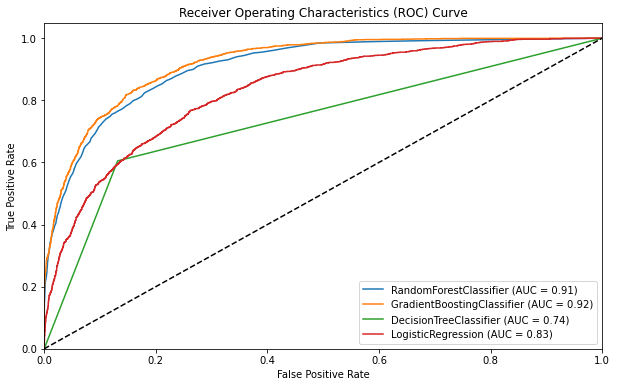

In [117]:
models = RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()

model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LogisticRegression']

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the models
models = [RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()]

plt.figure(figsize=(10, 6))

for model in models:
    model.fit(X_train, y_train)

    # Predict probabilities
    probabilities = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    auc_score = roc_auc_score(y_test, probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {auc_score:.2f})')

# Random guess line           
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
